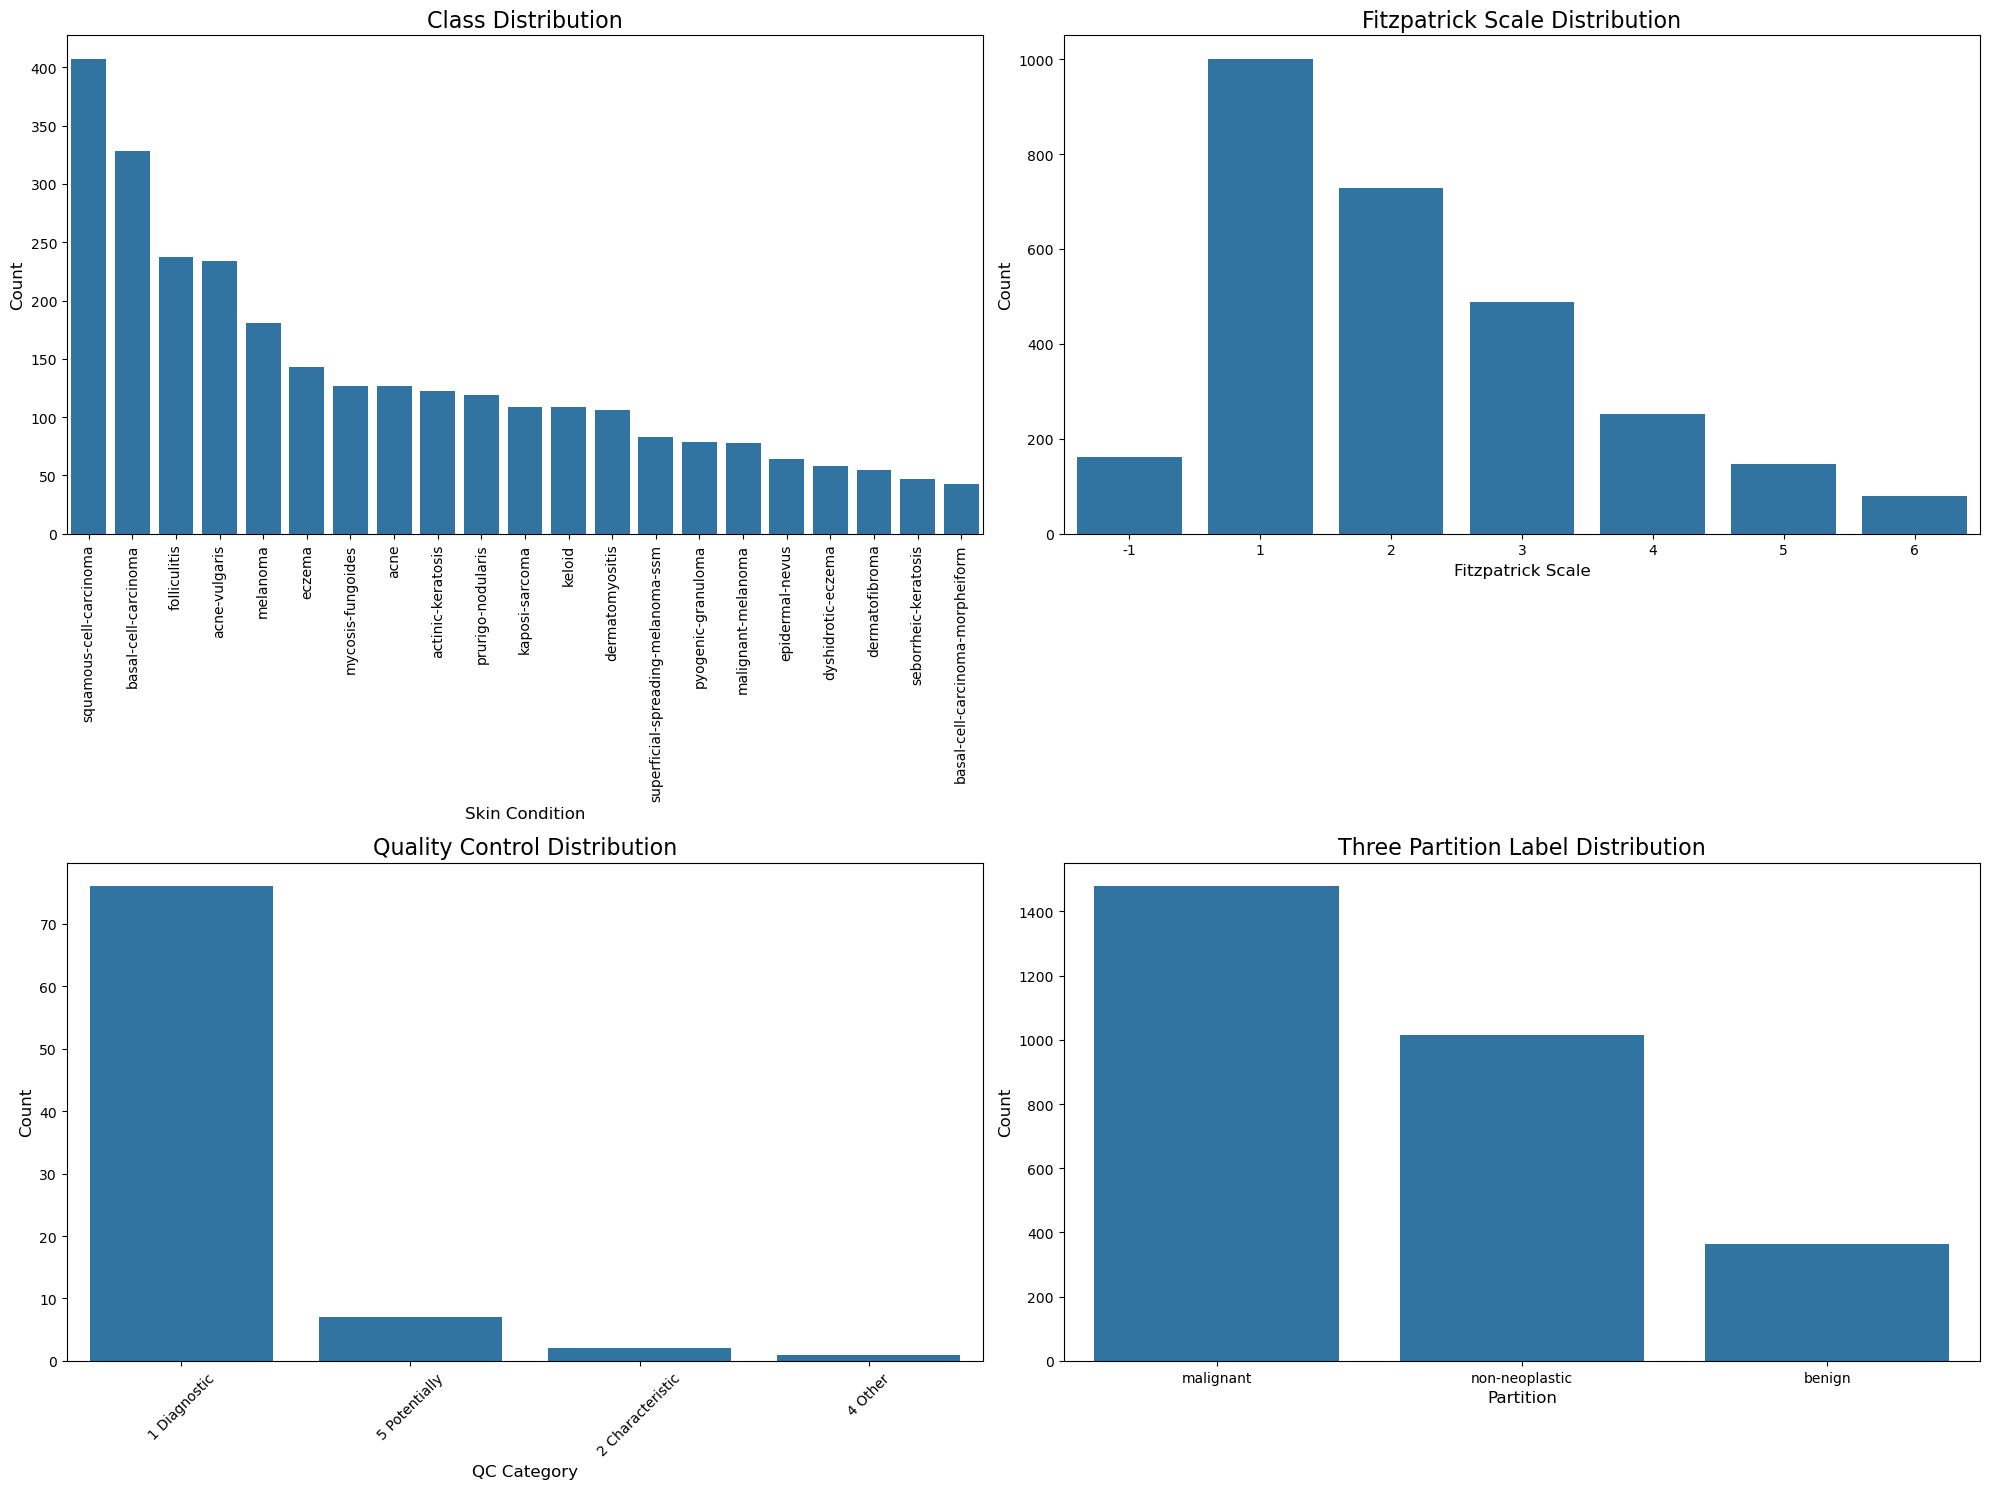

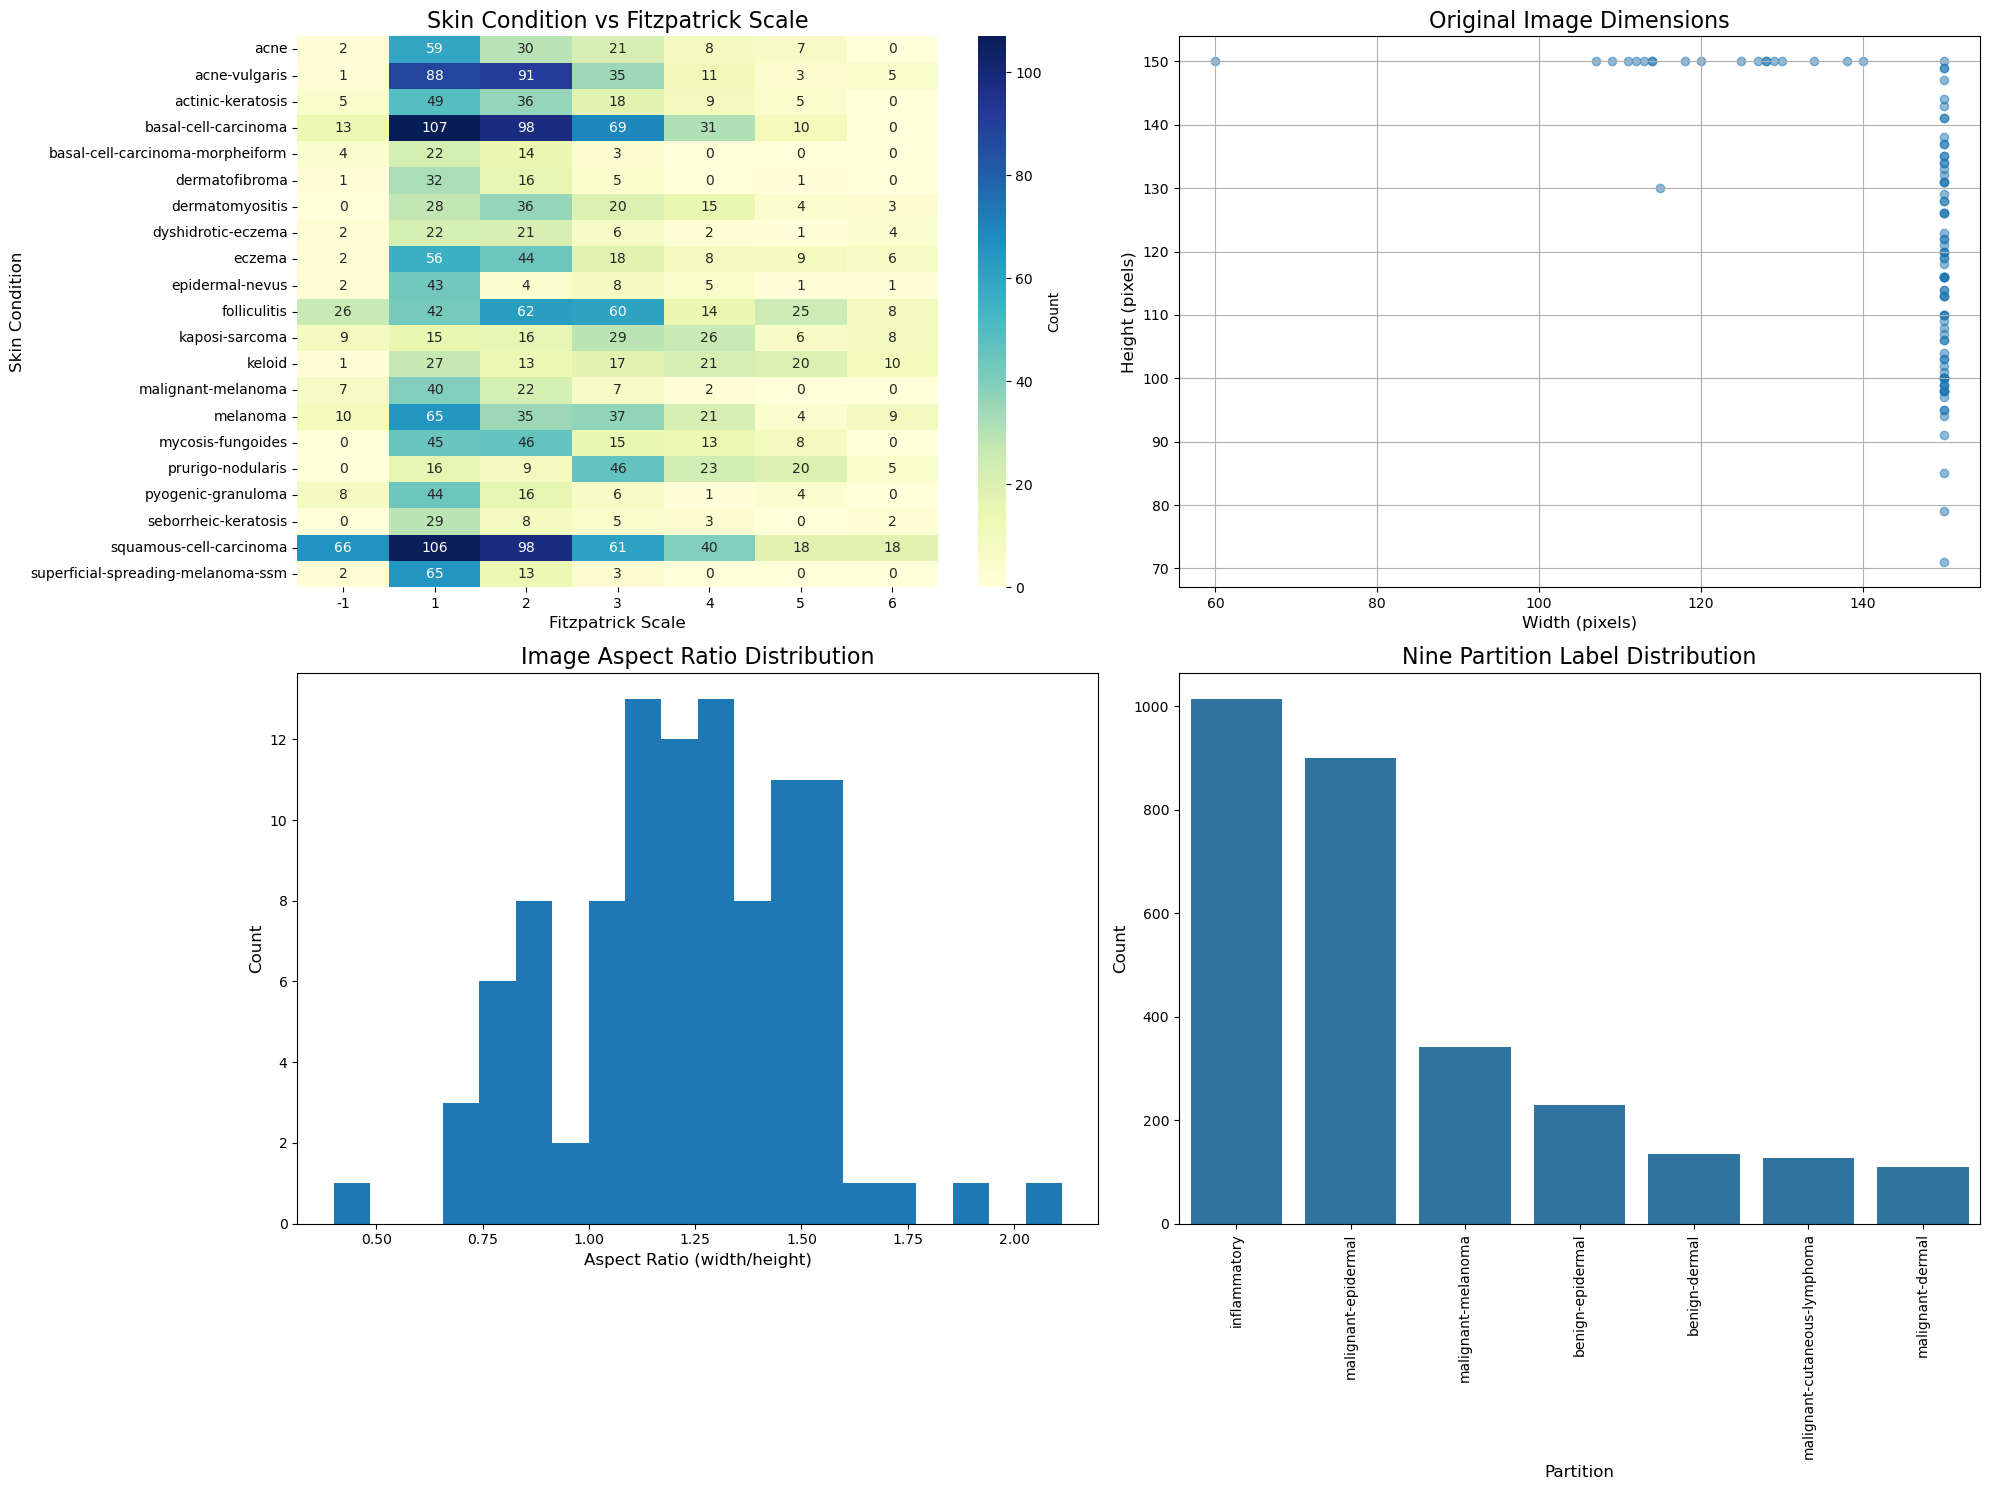

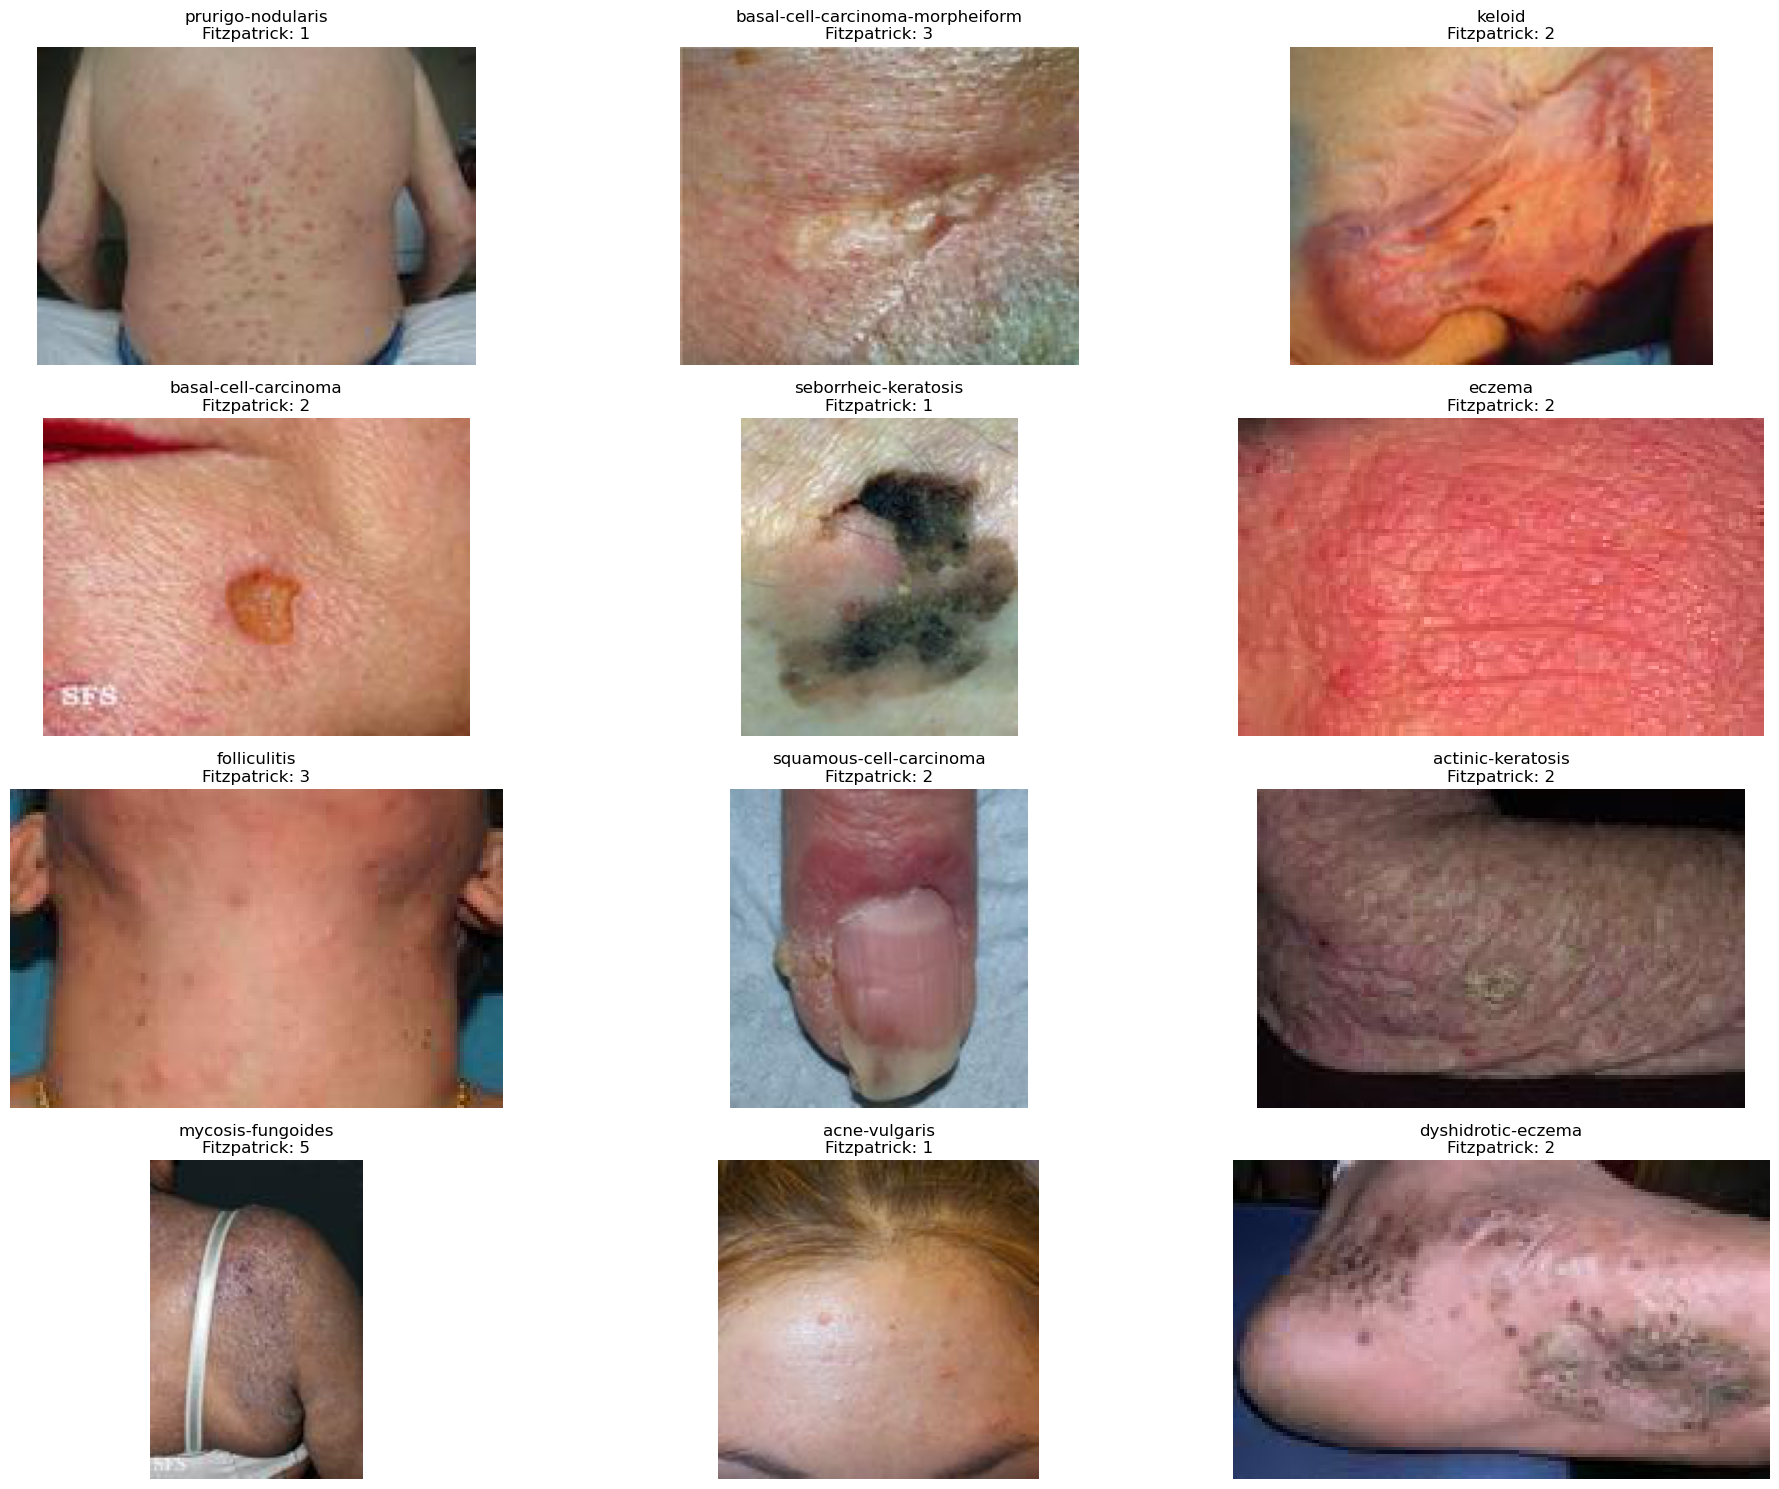

Visualization complete


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
train_csv_path = 'train.csv'
train_df = pd.read_csv(train_csv_path)

# Add '.jpg' extension to md5hash
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the file path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

# Replace ddi_scale with fitzpatrick_centaur
train_df['fitzpatrick_scale'] = train_df['fitzpatrick_centaur']
train_df.drop(columns=['ddi_scale'], inplace=True)

# Remove rows with wrongly labelled data
train_df = train_df[train_df['qc'] != '3 Wrongly labelled']

# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# Class Distribution
plt.subplot(2, 2, 1)
class_counts = train_df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Skin Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

# Fitzpatrick Scale Distribution
plt.subplot(2, 2, 2)
fitzpatrick_counts = train_df['fitzpatrick_scale'].value_counts().sort_index()
sns.barplot(x=fitzpatrick_counts.index.astype(str), y=fitzpatrick_counts.values)
plt.title('Fitzpatrick Scale Distribution', fontsize=16)
plt.xlabel('Fitzpatrick Scale', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Quality Control Distribution
plt.subplot(2, 2, 3)
qc_counts = train_df['qc'].value_counts()
sns.barplot(x=qc_counts.index, y=qc_counts.values)
plt.title('Quality Control Distribution', fontsize=16)
plt.xlabel('QC Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Three Partition Label Distribution
plt.subplot(2, 2, 4)
partition_counts = train_df['three_partition_label'].value_counts()
sns.barplot(x=partition_counts.index, y=partition_counts.values)
plt.title('Three Partition Label Distribution', fontsize=16)
plt.xlabel('Partition', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('dataset_overview.png')
plt.show()

# Create a second figure for more detailed analysis
plt.figure(figsize=(20, 15))

# Class vs Fitzpatrick Scale Heatmap
plt.subplot(2, 2, 1)
cross_tab = pd.crosstab(train_df['label'], train_df['fitzpatrick_scale'])
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Skin Condition vs Fitzpatrick Scale', fontsize=16)
plt.xlabel('Fitzpatrick Scale', fontsize=12)
plt.ylabel('Skin Condition', fontsize=12)

# Image Size Distribution
# Sample some images to check their sizes
base_image_dir = './train/train'
image_sizes = []

# Sample up to 100 images randomly to check sizes
sample_indices = random.sample(range(len(train_df)), min(100, len(train_df)))
for idx in sample_indices:
    row = train_df.iloc[idx]
    file_path = os.path.join(base_image_dir, row['file_path'])
    
    if os.path.exists(file_path):
        with Image.open(file_path) as img:
            width, height = img.size
            image_sizes.append((width, height))


if image_sizes:
    plt.subplot(2, 2, 2)
    widths, heights = zip(*image_sizes)
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Original Image Dimensions', fontsize=16)
    plt.xlabel('Width (pixels)', fontsize=12)
    plt.ylabel('Height (pixels)', fontsize=12)
    plt.grid(True)
    
    # Add histogram of aspect ratios
    plt.subplot(2, 2, 3)
    aspect_ratios = [w/h for w, h in image_sizes]
    plt.hist(aspect_ratios, bins=20)
    plt.title('Image Aspect Ratio Distribution', fontsize=16)
    plt.xlabel('Aspect Ratio (width/height)', fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Nine Partition Distribution
plt.subplot(2, 2, 4)
nine_partition_counts = train_df['nine_partition_label'].value_counts()
sns.barplot(x=nine_partition_counts.index, y=nine_partition_counts.values)
plt.title('Nine Partition Label Distribution', fontsize=16)
plt.xlabel('Partition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('dataset_details.png')
plt.show()

# Create a third figure to visualize sample images
plt.figure(figsize=(20, 15))

# Sample Images from Each Class
# Get unique classes
unique_classes = train_df['label'].unique()
num_classes = len(unique_classes)
rows = int(np.ceil(num_classes / 3))

for i, condition in enumerate(unique_classes):
    if i < 12:  # Limit to 12 classes for visibility
        class_samples = train_df[train_df['label'] == condition]
        
        if len(class_samples) > 0:
            sample_row = class_samples.sample(1).iloc[0]
            file_path = os.path.join(base_image_dir, sample_row['file_path'])
            
            if os.path.exists(file_path):
                plt.subplot(4, 3, i+1)
                img = plt.imread(file_path)
                plt.imshow(img)
                plt.title(f"{condition}\nFitzpatrick: {sample_row['fitzpatrick_scale']}", fontsize=12)
                plt.axis('off')

plt.tight_layout()
plt.savefig('sample_images.png')
plt.show()

# Model performance visualization (to be added after training)
def plot_training_history(history):
    plt.figure(figsize=(15, 5))
    
    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize=16)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss', fontsize=16)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()


print("Visualization complete")